In [29]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from pathlib import Path
from typing import List
from typing import Any
import json
import os
import numpy as np

In [30]:
def custom_legend(ax, title, n=5):
    """
    Reduce the number of entries in the Legend,
    by only showing first,last and every n-th
    """
    handles, labels = ax.get_legend_handles_labels()
    if len(handles) <= n + 2:
        return ax.legend(title=title)
    new_handles = [handles[0]] + handles[1:-1:n] + [handles[-1]]
    new_labels = [labels[0]] + labels[1:-1:n] + [labels[-1]]
    return ax.legend(new_handles, new_labels, title=title)


class JSONLogger:
    def __init__(self, filepath: str):
        self.filepath = Path(filepath)
        self.filepath.parent.mkdir(parents=True, exist_ok=True)

    def append(self, results: Any) -> None:
        with self.filepath.open("a") as f:
            f.write(json.dumps(results) + "\n")

    def read(self) -> list:
        results = []
        with open(self.filepath) as f:
            results = [json.loads(line) for line in f]
        return results

In [65]:
root="~/scratch/detailed_save/"
exp_type = "variable"
#22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102
rule = 30
candidate_idx = -1

filename = os.path.expanduser(f"{root}/noise_results/stats_{rule}_{exp_type}_{candidate_idx}_noise_data.jsonl")

log = JSONLogger(filename)

In [66]:
M = 0.3
N = 20

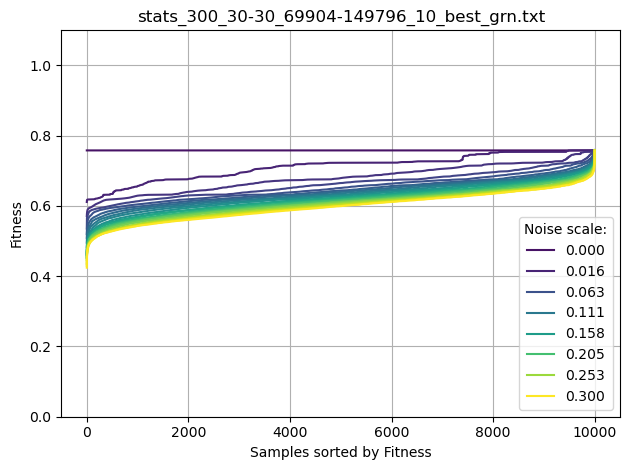

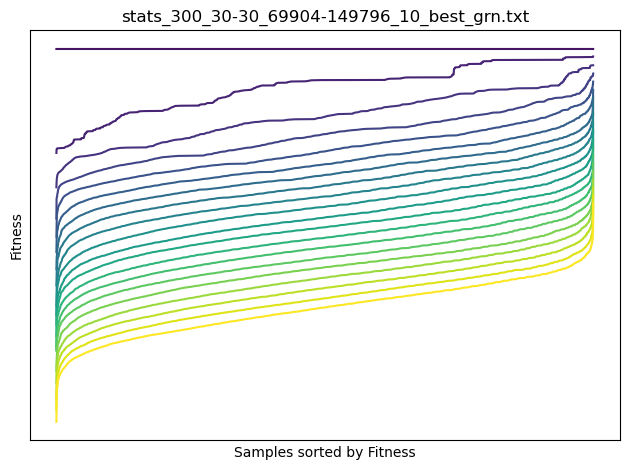

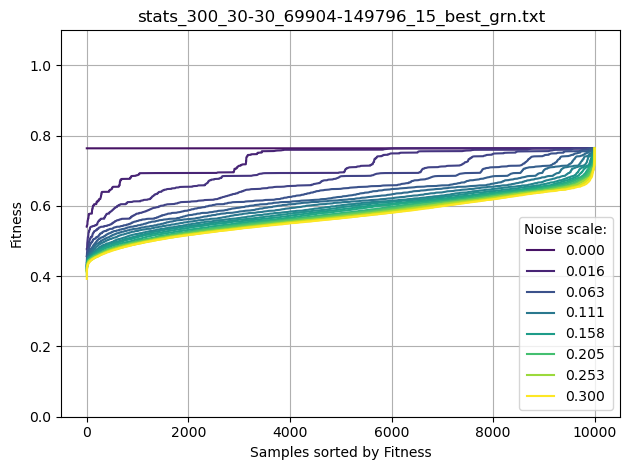

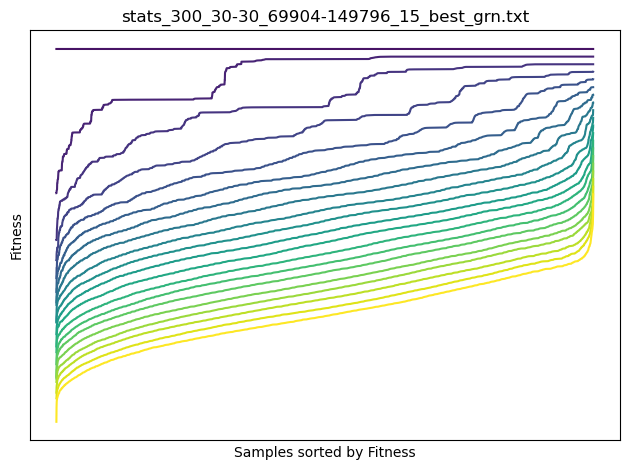

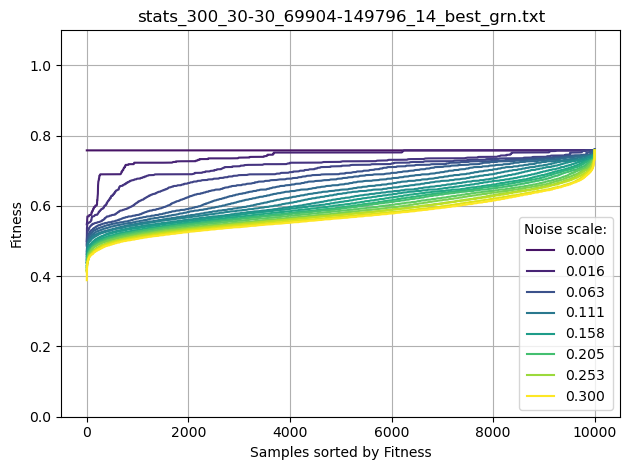

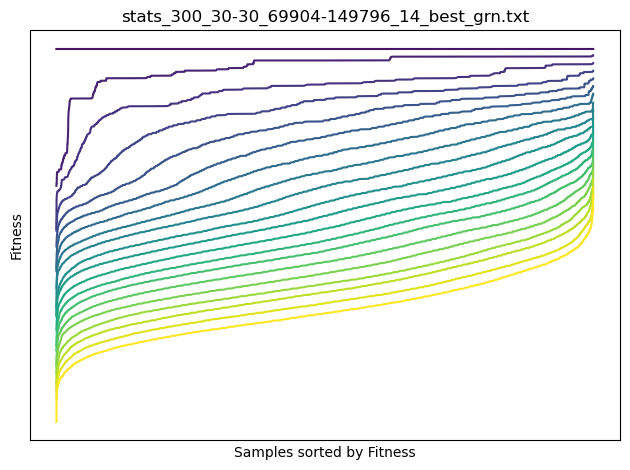

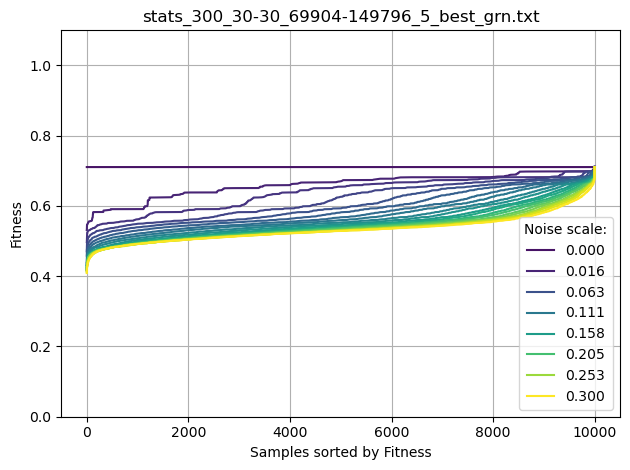

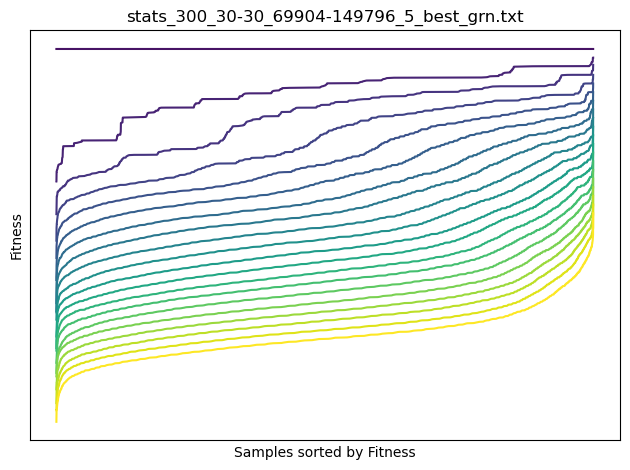

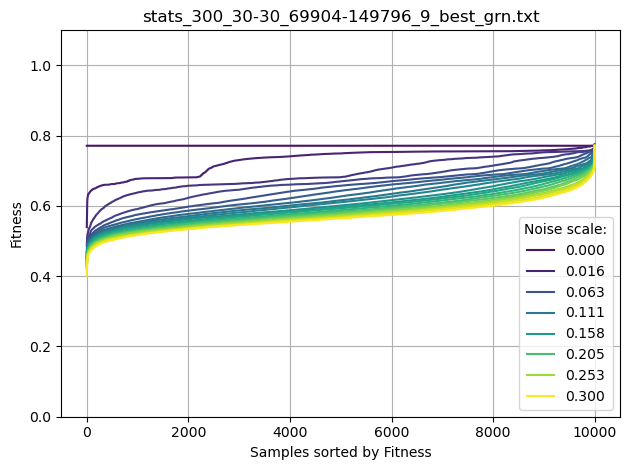

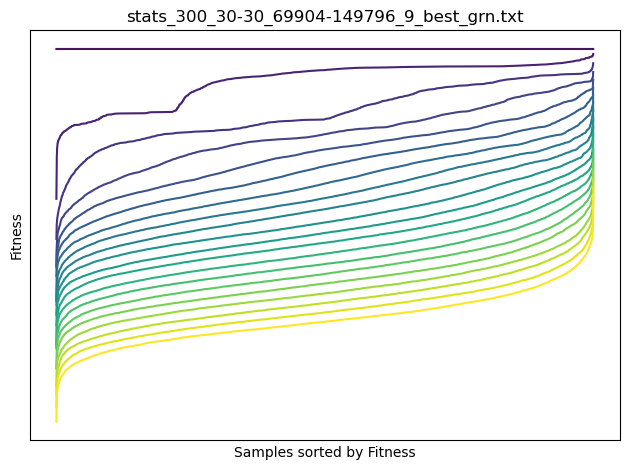

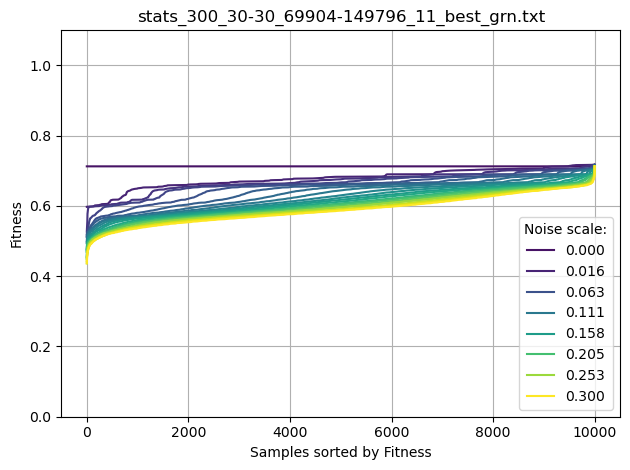

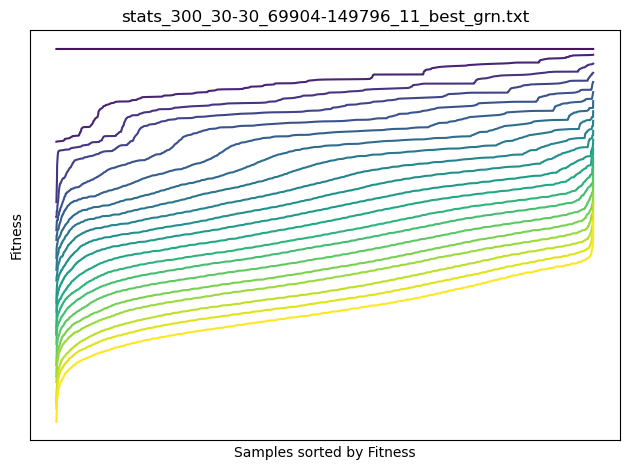

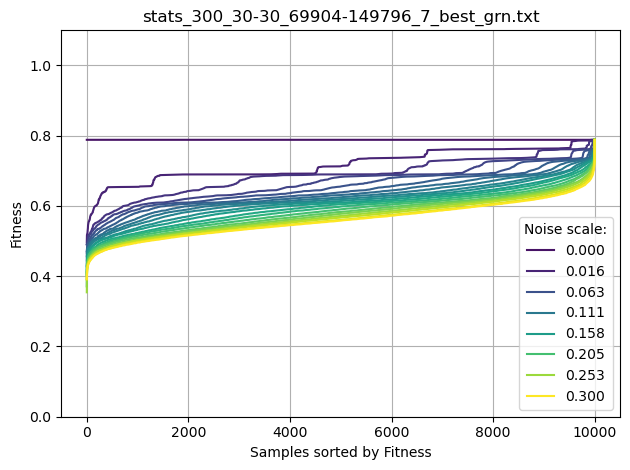

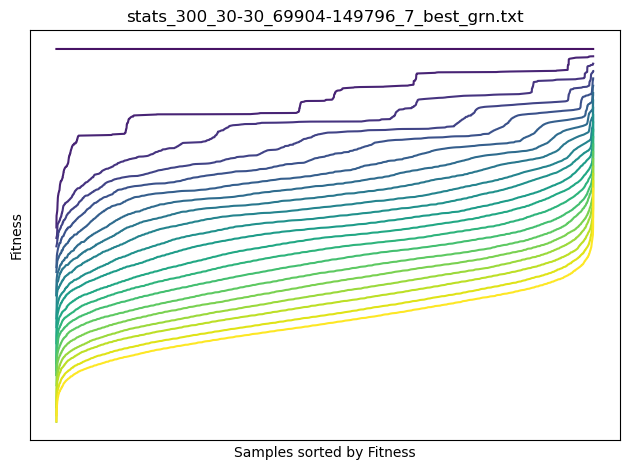

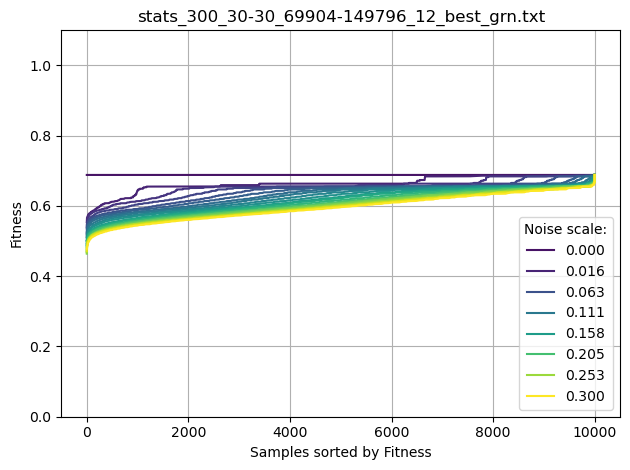

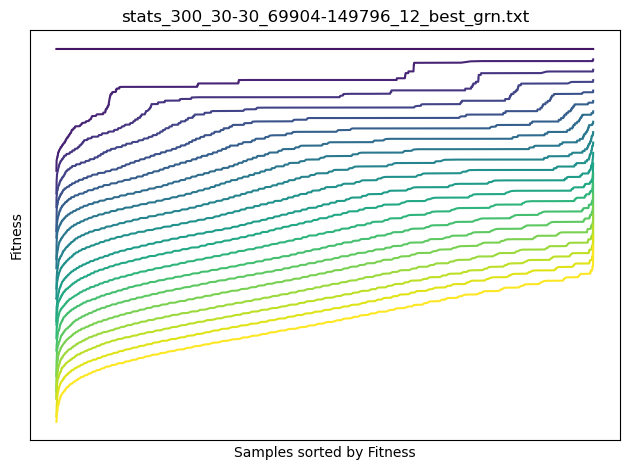

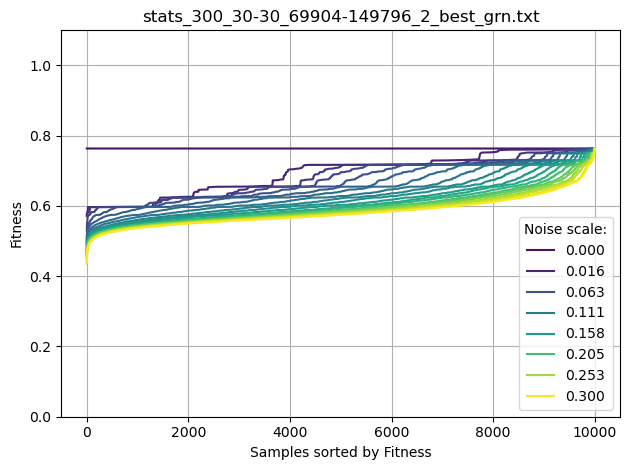

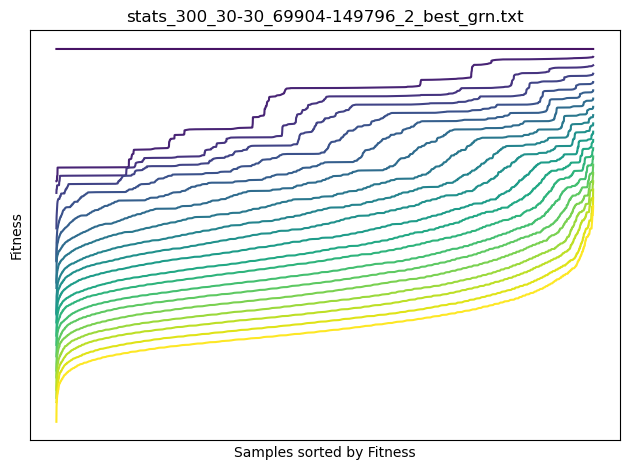

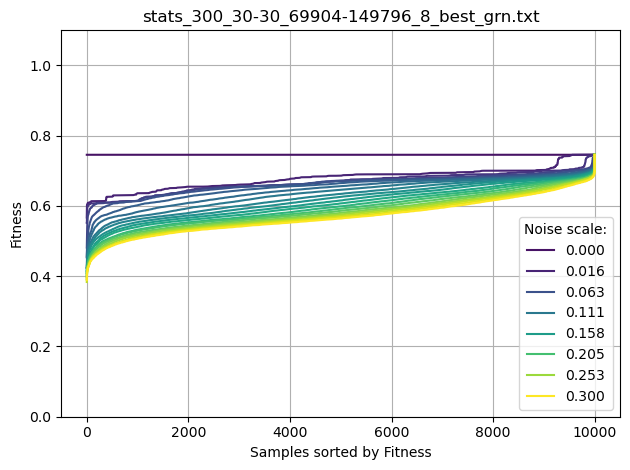

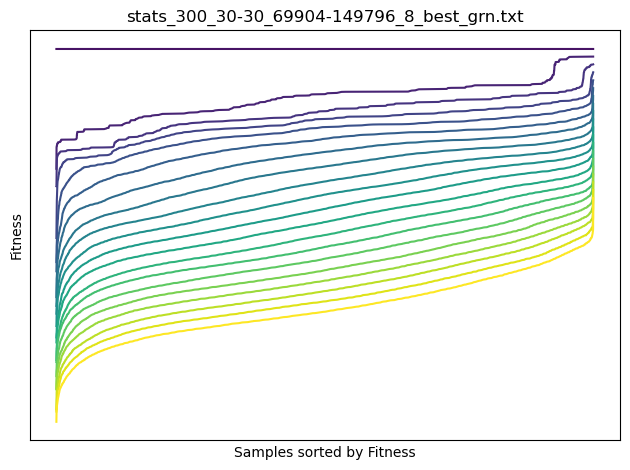

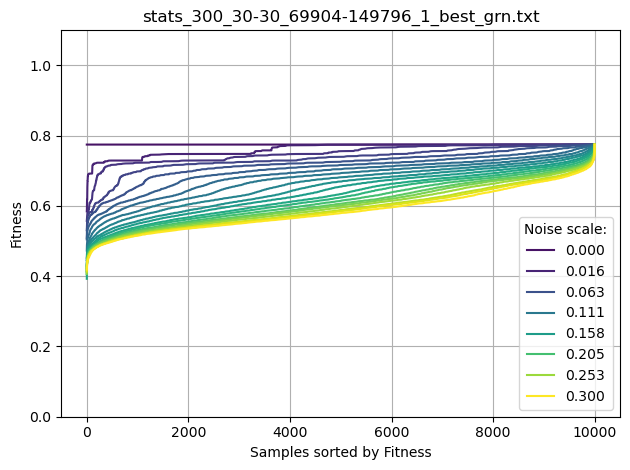

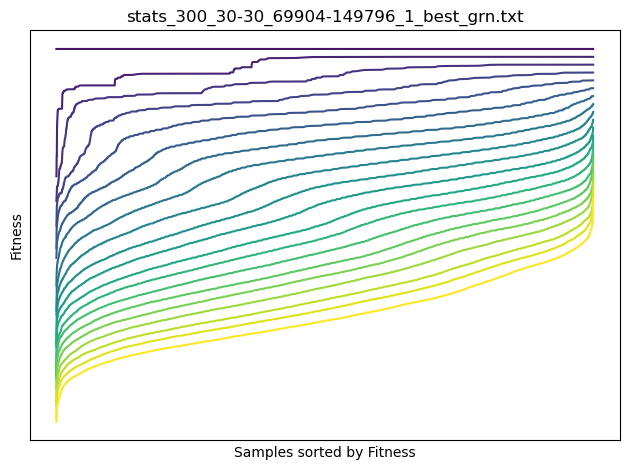

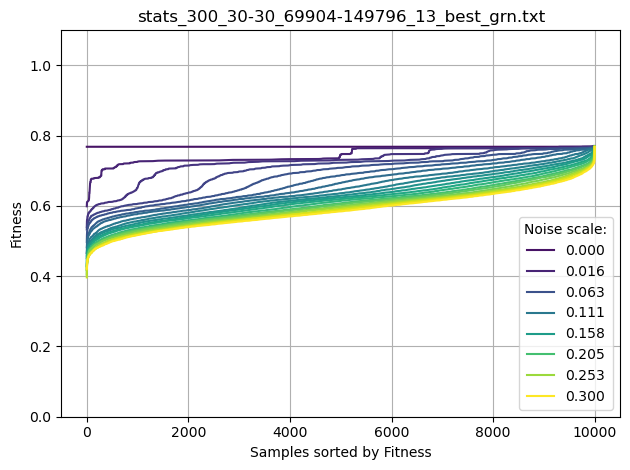

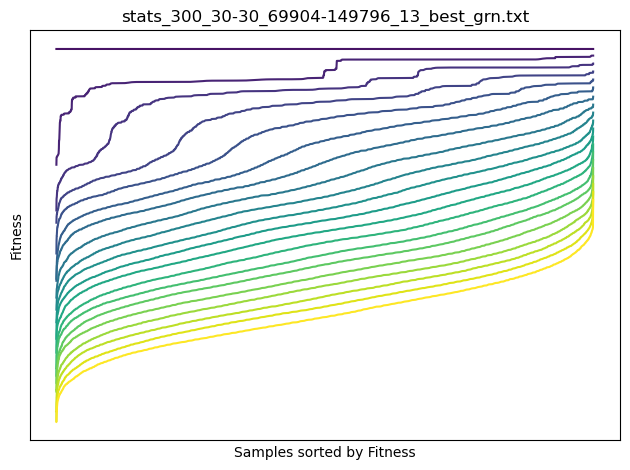

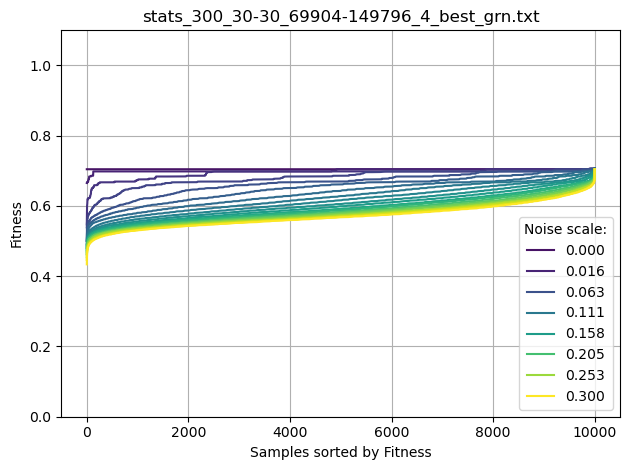

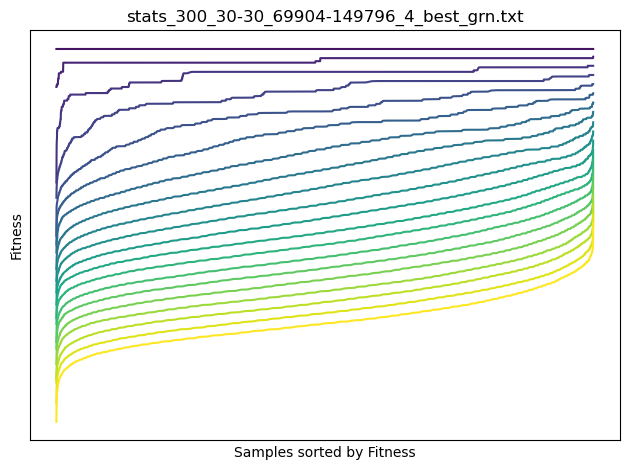

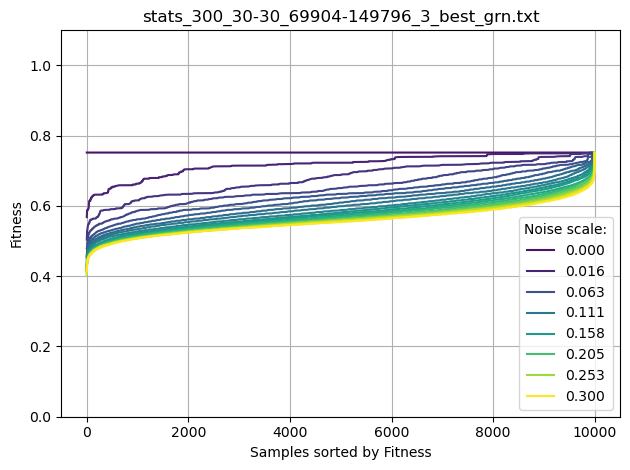

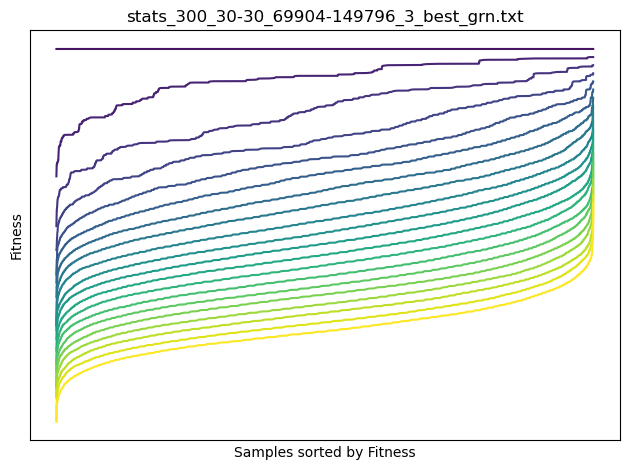

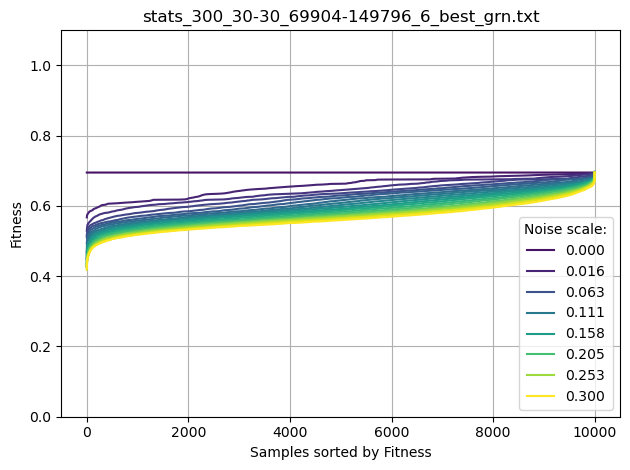

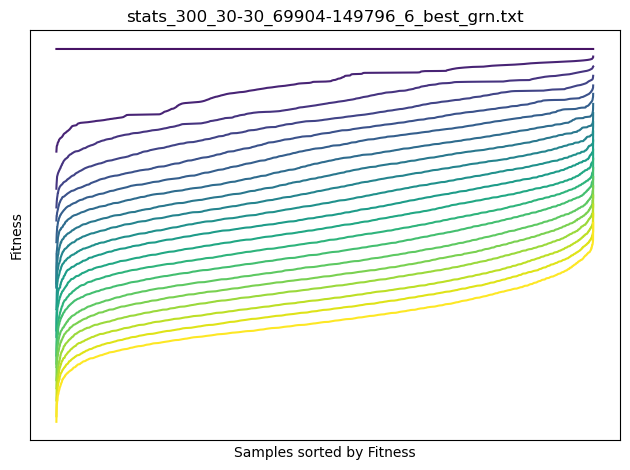

In [67]:
all_data = log.read()
for exp in all_data:
    data = exp["data"]
    name = Path(exp["file"]).name
    fig, ax = plt.subplots()
    for i, (fitnesses, noise) in enumerate(zip(data, np.linspace(0, M, N))):
        ax.plot(fitnesses, color=viridis((i + 1) / N), label=f"{noise:.3f}")
    # plt.axhline(fitnesses[0], color="red", lw=0.5)
    ax.set_ylim(0, 1.1)
    plt.grid()
    plt.ylim(0, 1.1)
    plt.ylabel("Fitness")
    plt.xlabel("Samples sorted by Fitness")
    custom_legend(ax, title="Noise scale:", n=3)
    plt.title(name)
    plt.tight_layout()
    # plt.savefig("plots/" + name + ".fitnesses.png", dpi=300)
    # plt.close()
    plt.show()

    fig, ax = plt.subplots()
    for i, fitnesses in enumerate(data):
        # label=f"{np.linspace(0,M,N)[i]:.3f}"
        ax.plot(np.array(fitnesses) - i / 80, color=viridis((i + 1) / N))
    # ax.annotate(
    #     "different levels of noise\n(displaced for visibility)",
    #     xy=(2300, 0.75),
    #     xytext=(1500, 0.3),
    #     arrowprops=dict(fc="gray", ec="None", shrink=0.01),
    # )
    plt.grid()
    plt.yticks([])
    plt.xticks([])
    plt.ylabel("Fitness")
    plt.xlabel("Samples sorted by Fitness")
    # plt.legend()
    plt.title(name)
    plt.tight_layout()
    # plt.savefig("plots/" + name + ".stagger.png", dpi=300)
    # plt.close()
    plt.show()